In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
#Split the dataset into predictor variables X(all columns except 'Outcomes') and the target
#variable y("Outcomes")
X=df.drop('Outcome',axis=1)
y=df['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [9]:
y_test_prediction = classifier.predict(X_test)
y_test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [10]:
comparision = pd.DataFrame({'Actual':y_test,'Predicted':y_test_prediction})
comparision[0:10]

,Actual,Predicted
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0
472,0,0
233,0,0
385,0,0
556,0,0
59,0,0


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_prediction)

0.7748917748917749

In [12]:
y_train_prediction = classifier.predict(X_train)
accuracy_score(y_train,y_train_prediction)

0.7746741154562383

In [13]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,y_test_prediction)
conf_mat

array([[132,  14],
       [ 38,  47]])

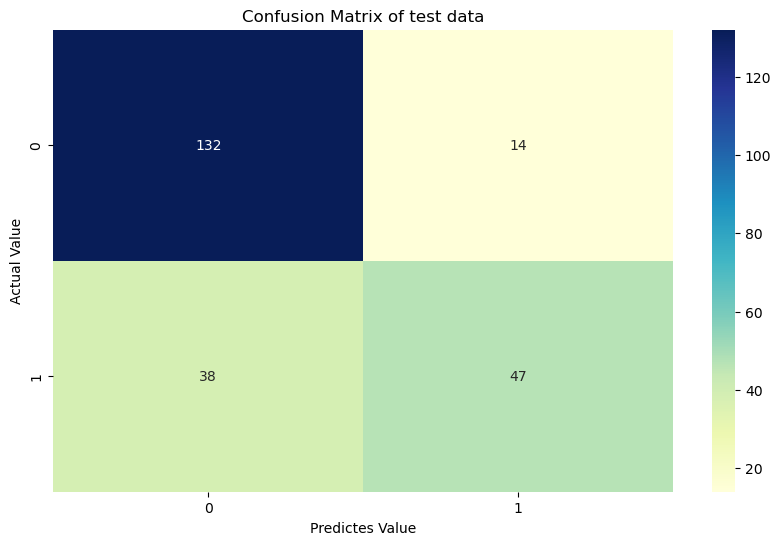

In [18]:
#create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix of test data")
plt.xlabel("Predictes Value")
plt.ylabel("Actual Value")
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_prediction))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       146
           1       0.77      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



In [24]:
TN=conf_mat[0][0]
FP=conf_mat[0][1]
FN=conf_mat[1][0]
TP=conf_mat[1][1]

recall=TP/(TP+FN)
print("Recall: ",recall)

precision=TP/(TP+FP)
print("Precision: ",precision)

specificity=TN/(TN+FP)
print("Specificity: ",specificity)

accuracy=(TP+TN)/(TP+TN+FP+FN)
print("Accuracy: ",accuracy)

Recall:  0.5529411764705883
Precision:  0.7704918032786885
Specificity:  0.9041095890410958
Accuracy:  0.7748917748917749
